<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC11_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
#drive.mount('/content/drive')

**Redes Neurais**

In [2]:
import pandas as pd

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20ok.csv')
teste  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20prd.csv')
treino.head(2)

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,2,0
1,1,1,1,1,0


In [8]:

import tensorflow
from tensorflow import keras
#4 | 3 | 2 | 1
nn = keras.Sequential([
      keras.layers.Input(len(treino.columns)-1),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')

nn.fit(treino[['previsao',  'temperatura',  'umidade',  'vento']] , treino['jogar'])
previsoes = nn.predict(treino[['previsao',  'temperatura',  'umidade',  'vento']] )
previsoes

1/1 [==============================] - 0s 410ms/step - loss: 1.7518


array([[0.1294046 ],
       [0.21577051],
       [0.12516105],
       [0.0724951 ],
       [0.03378999],
       [0.03491771],
       [0.04870564],
       [0.13533396],
       [0.06544662],
       [0.06209767],
       [0.12062138],
       [0.1026803 ],
       [0.06484425],
       [0.07481441]], dtype=float32)

In [11]:

limiar = 0.1
def ativacao(v):
  if(v > limiar):
    return 0
  else:
    return 1

prev_treino = []
for prev in previsoes:
  prev_treino.append(ativacao(prev))

prev_treino 

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]

In [12]:
y_treino = treino['jogar']
y_treino

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: jogar, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
acuracia_treino= accuracy_score(y_treino,prev_treino)
acuracia_treino*100

64.28571428571429

In [19]:
previsoes = nn.predict(teste[['previsao',  'temperatura',  'umidade',  'vento']] )
prev_teste = []
for prev in previsoes:
  prev_teste.append(ativacao(prev))

prev_teste

[0, 0, 0, 0, 1, 1]

In [24]:
y_teste = [1,0,0,0,1,0]
y_teste

[1, 0, 0, 0, 1, 0]

In [25]:
from sklearn.metrics import accuracy_score
acuracia_teste= accuracy_score(y_teste,prev_teste)
acuracia_teste*100

66.66666666666666

[[3 1]
 [1 1]]


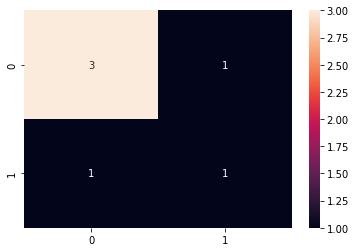

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

**Exercicio - Redes Neurais**

In [5]:
 

import pandas as pd
import tensorflow 
from tensorflow import keras


train = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
valid  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever.csv')
#print(train)
print(valid)
 
nn = keras.Sequential([ 
    keras.layers.Input(len(train.columns)-1),
    keras.layers.Dense(3, activation='relu' ), 
    keras.layers.Dense(2, activation='relu'), 
    keras.layers.Dense(2, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
])

adam = keras.optimizers.Adam(lr=0.002)
nn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(train[['Genero','GrauEscolaridade','Profissao','Renda']],train['Inadimplente'], batch_size=20, epochs=4,validation_split=0.20)
previsao = nn.predict(valid[['Genero','GrauEscolaridade','Profissao','Renda']])
print(previsao)


   Genero  GrauEscolaridade  Profissao  Renda
0       1                 4          1   1.40
1       2                 7          9   2.60
2       1                 7          9   5.80
3       1                 7          9   4.70
4       1                 7          9   3.90
5       1                 8          9   3.25
6       1                 8          8   7.20
7       2                 4          3   1.25
Epoch 1/4


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 99ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6927 - val_accuracy: 0.6500
Epoch 2/4
4/4 [==============================] - 0s 25ms/step - loss: 0.6928 - accuracy: 0.6000 - val_loss: 0.6924 - val_accuracy: 0.6500
Epoch 3/4
4/4 [==============================] - 0s 23ms/step - loss: 0.6926 - accuracy: 0.6000 - val_loss: 0.6921 - val_accuracy: 0.6500
Epoch 4/4
4/4 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.6000 - val_loss: 0.6918 - val_accuracy: 0.6500
[[0.50230813]
 [0.50230813]
 [0.50230813]
 [0.50230813]
 [0.50230813]
 [0.50230813]
 [0.50230813]
 [0.50230813]]


In [6]:
limiar = 0.54
def ativacao(prb):
  if(prb>=limiar):
    return 0
  else:
    return 1

p = list()  
for prev in previsao:
  p.append(ativacao(prev))

print(p)

[1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
valid

,Genero,GrauEscolaridade,Profissao,Renda
0,1,4,1,1.40
1,2,7,9,2.60
2,1,7,9,5.80
3,1,7,9,4.70
4,1,7,9,3.90
5,1,8,9,3.25
6,1,8,8,7.20
7,2,4,3,1.25
